# **Project Name**    - Medibuddy EDA and Insights



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - (Individual) B Lakshmi Narasimhan.


# **Project Summary -**

This project focuses on solving key business challenges for MediBuddy by using Exploratory Data Analysis (EDA) to convert raw insurance and customer data into actionable insights. The primary problem was a lack of clarity on customer behavior, revenue contribution, and factors influencing growth and churn.

Through systematic data cleaning, merging, and visualization, the analysis identified patterns in customer demographics, policy usage, and revenue distribution. Key segments contributing most to business value were highlighted, while low-engagement or low-revenue segments were identified as potential risk areas. The analysis also uncovered inefficiencies such as underperforming customer groups and uneven contribution across plans.

By addressing these problems, the project provides data-driven recommendations to improve customer targeting, optimize pricing and product offerings, and enhance retention strategies. Overall, the analysis helps MediBuddy move from intuition-based decisions to insight-driven actions that support sustainable business growth.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To analyze the impact of demographic, lifestyle, and health factors on insurance claim amounts and build a machine learning model to accurately predict medical insurance costs for MediBuddy.**

#### **Define Your Business Objective?**

To enable MediBuddy to make data-driven decisions in policy pricing, risk assessment, and customer segmentation by identifying key factors influencing insurance claim costs and accurately predicting future medical expenses.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [18]:
df_price = pd.read_excel('~/Documents/Labmentix project 2 /Medibuddy_Insurance_Data_Price (1) (2).xlsx')
df_details = pd.read_excel('~/Documents/Labmentix project 2 /Medibuddy_insurance_data_personal_details (1) (2).xlsx')

print("Medibuddy Insurance Data Price (df_price):")
display(df_price.head())

print("\nMedibuddy insurance data personal details (df_details):")
display(df_details.head())

#loading the both the datasets with the name of df_price for insurance data price and df_details for personal details




Medibuddy Insurance Data Price (df_price):


,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520



Medibuddy insurance data personal details (df_details):


,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


### Datasets merging

In [20]:
# Merging the Datasets
df = pd.merge(df_price, df_details, on='Policy no.', how='inner')
#'how' is an argument that type of merge to performed and 'inner' means allows rows with matching column in both the datasets

display(df.head())

#'Policy no' is common on the both the datasets

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


In [21]:
# downloading the merged dataset as new dataset
df.to_csv('merged_medibuddy_data.csv', index=False)
print("Dataset saved as 'merged_medibuddy_data.csv'")

Dataset saved as 'merged_medibuddy_data.csv'


### Dataset Rows & Columns count

In [23]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1338
Number of columns: 8


In [24]:
# Displaying column names
print("Dataset Columns:")
for col in df.columns:
    print(col)

Dataset Columns:
Policy no.
age
sex
bmi
charges in INR
children
smoker
region


### Dataset Information

In [27]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


#### Duplicate Values

In [29]:
# Dataset Duplicate Value Count
df.duplicated().sum() # this gives the count of duplicate values

np.int64(0)

#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
df.isnull().sum() #this counts the missing values

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64

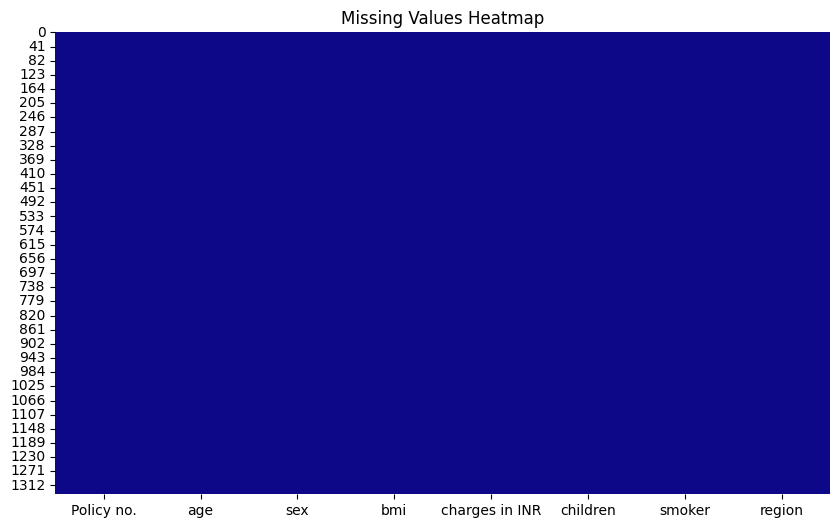

In [32]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma') #color bar = false, tells seaborn not to display the cbar next to heatmap
plt.title('Missing Values Heatmap')
plt.show()

#'heatmap' is the great choice for visualizing the missing values because it gives quick and intuitive visual summary.

# this consistent color across all cells indicates that there are no missing values in any of your columns.

### What did you know about your dataset?

The dataset was created by merging two Excel files—Medibuddy Insurance Data Price and Medibuddy Insurance Data Personal Details—using Policy no. as the common key. It consists of 1,338 records and 8 columns, including demographic, health, and insurance-related attributes such as age, sex, BMI, number of children, smoking status, region, and insurance charges (INR). The data contains a mix of integer, float, and categorical variables. There are no duplicate records and no missing values, making the dataset clean and ready for analysis and modeling.

## ***2. Understanding Your Variables***

In [36]:
# Dataset Columns
df.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [37]:
# Dataset Describe
df.describe()

,age,bmi,charges in INR,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.
for col_name in df.columns:
    print(f"\nUnique values for column '{col_name}':")
    if df[col_name].dtype == 'object': # For categorical columns
        print(df[col_name].value_counts())
    else: # For numerical columns
        print(df[col_name].nunique(), "unique values")
        if df[col_name].nunique() < 20: # Display all if less than 20 unique values
            print(df[col_name].unique()) #nunique is number of unique elements
        else:
            print(f"First 5 unique values: {df[col_name].unique()[:5]}")


Unique values for column 'Policy no.':
Policy no.
PLC156898    1
PLC164980    1
PLC164962    1
PLC164953    1
PLC164944    1
            ..
PLC160903    1
PLC160894    1
PLC160885    1
PLC160876    1
PLC168931    1
Name: count, Length: 1338, dtype: int64

Unique values for column 'age':
47 unique values
First 5 unique values: [19 18 28 33 32]

Unique values for column 'sex':
sex
male      676
female    662
Name: count, dtype: int64

Unique values for column 'bmi':
548 unique values
First 5 unique values: [27.9   33.77  33.    22.705 28.88 ]

Unique values for column 'charges in INR':
1337 unique values
First 5 unique values: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]

Unique values for column 'children':
6 unique values
[0 1 3 2 5 4]

Unique values for column 'smoker':
smoker
no     1064
yes     274
Name: count, dtype: int64

Unique values for column 'region':
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [42]:
#### Rename Column for Consistency

##To simplify analysis and plotting, let's rename the 'charges in INR' column to 'charges'.

df.rename(columns={'charges in INR': 'charges'}, inplace=True)
print("Column 'charges in INR' renamed to 'charges'.")

Column 'charges in INR' renamed to 'charges'.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Q1. Does the gender of the person matter for the company as a constraint for extending policies?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_9104/1917985878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='pastel') # palette is a parameter and pastel is a color from seaborn


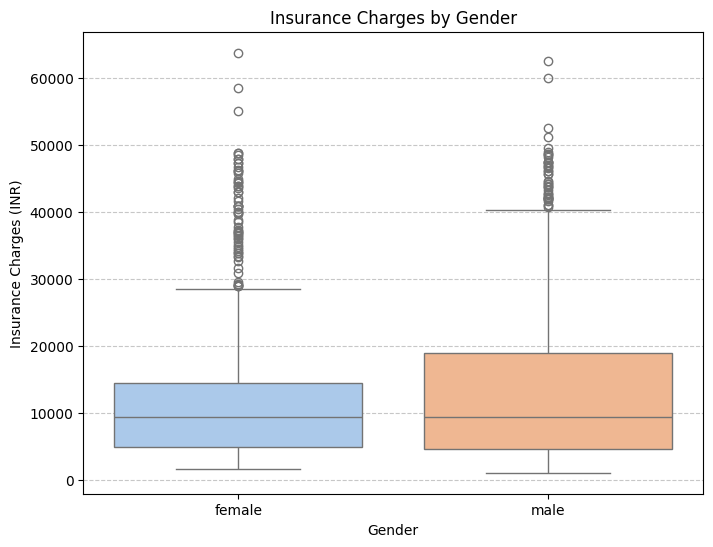

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='pastel') # palette is a parameter and pastel is a color from seaborn
plt.title('Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen to visualize insurance charges by gender because it clearly shows the median, spread, and outliers, enabling an effective comparison of the distribution of charges between male and female policyholders.

##### 2. What is/are the insight(s) found from the chart?

The box plot indicates that males have a slightly higher median insurance charge than females, though the difference is minimal. Both genders exhibit a wide spread in charges, reflecting high variability, and a significant number of high-value outliers are present for both groups, showing that unusually high insurance costs occur irrespective of gender.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis suggests that gender is not a significant factor in determining insurance charges, as both genders show similar distributions with only a slight median difference. This supports the adoption of fair, gender-neutral pricing, which can enhance customer trust and business growth. The presence of high-cost outliers indicates that other factors play a more critical role in risk assessment, and relying on gender-based policy decisions could negatively impact the company’s reputation and customer retention.

#### Chart - 2

#### Q2. What is the average amount of money the company spent over each policy cover?

The average insurance charges are: INR 13270.42


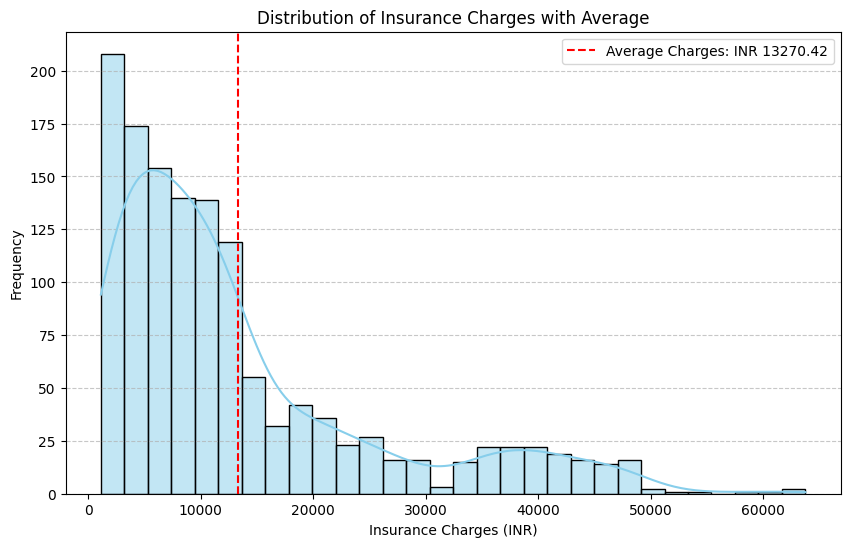

In [54]:
# Calculate the average insurance charges
average_charges = df['charges'].mean()
print(f"The average insurance charges are: INR {average_charges:.2f}")

# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='skyblue')#kde(kernel density est) --> smooth curve showing the distribution's shape
plt.axvline(average_charges, color='red', linestyle='--', label=f'Average Charges: INR {average_charges:.2f}')
#this adds a vertical line to histogram at the positions mentions
plt.title('Distribution of Insurance Charges with Average')
plt.xlabel('Insurance Charges (INR)')
plt.ylabel('Frequency')
plt.legend() #This displays the legend on the plot, which includes the label for the average charges line.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE was used to visualize the distribution of insurance charges, as it clearly shows charge frequencies and the overall distribution shape, while the average line helps illustrate how individual charges are distributed around the mean.

##### 2. What is/are the insight(s) found from the chart?

The histogram reveals a right-skewed distribution of insurance charges, where most policies have lower costs and a smaller number of high-value claims create a long tail. The average charge is around INR 13,270, with most values lying below this mean, indicating that high-cost policies raise the overall average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of insurance charges supports better pricing and risk management decisions. The right-skewed nature of the data shows that relying only on the average charge can be misleading, making risk-based and differential pricing essential. Identifying high-cost outliers helps manage large payouts and allocate resources efficiently. Ignoring this skewness may result in underpricing high-risk policies or overpricing low-risk ones, potentially leading to financial losses and customer churn.

#### Chart - 3
Q3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_9104/4158115266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='viridis')


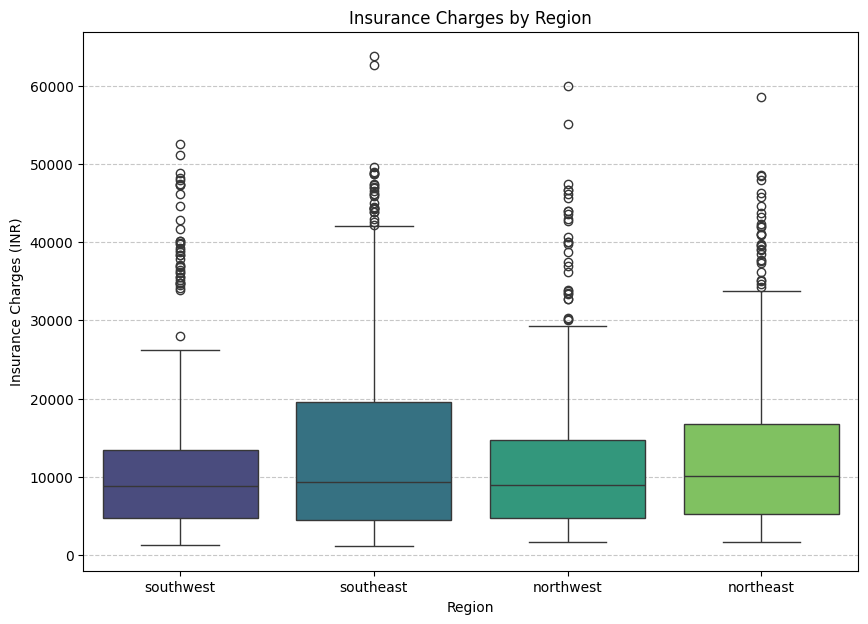

In [62]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 7))
sns.boxplot(x='region', y='charges', data=df, palette='viridis')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was used to compare insurance charges across geographic regions, as it clearly displays the median, variability, and outliers for each region, enabling an effective comparison of insurance cost patterns between regions.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows clear regional differences in insurance charges. The Southeast has the highest median charges, greater variability, and more extreme outliers, while the Southwest has the lowest median charges. The Northeast and Northwest display similar, moderate charge levels. Despite these differences, all regions experience high-cost outliers, indicating that expensive claims can occur across any region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The regional analysis indicates that offering location-based or regionally adjusted insurance policies can create strong business value. Region-specific pricing can improve profitability, enhance risk assessment, and increase competitiveness through tailored offerings and targeted marketing. Ignoring regional differences may result in financial losses, customer dissatisfaction, higher churn, and missed growth opportunities. Therefore, implementing geographically differentiated policies is advisable for MediBuddy.

#### Chart - 4
Q4. Does the no. of dependents make a difference in the amount claimed?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_9104/1893258909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette='GnBu')


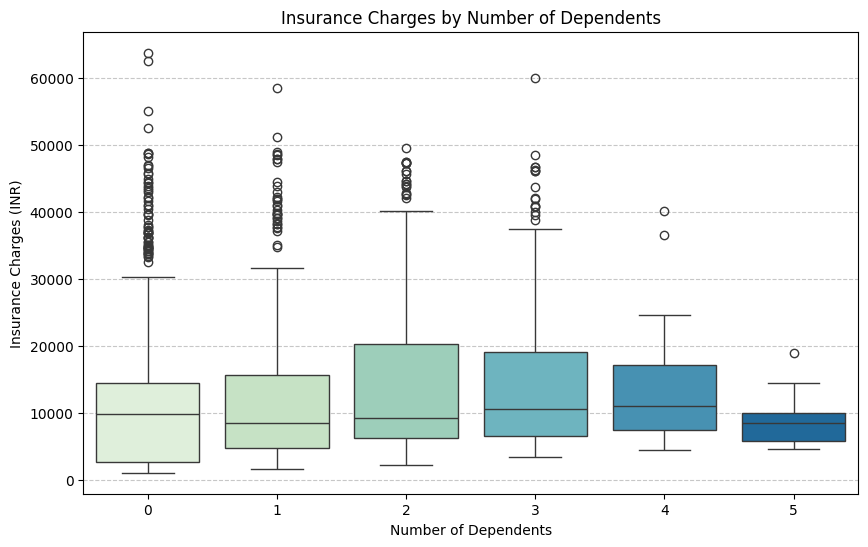

In [70]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df, palette='GnBu')
plt.title('Insurance Charges by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Insurance Charges (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was used to analyze insurance charges across different numbers of dependents, as it clearly compares medians, variability, and outliers for each family size, helping assess how the number of dependents influences insurance claim amounts.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows no strong linear relationship between the number of dependents and insurance charges. Although median charges vary slightly across family sizes, the distributions largely overlap, with wide spreads and high-value outliers present even for individuals with no or few dependents. This indicates that while dependents may have some influence, other factors play a more significant role in determining high insurance claims.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis indicates that the number of dependents has a limited and non-linear impact on insurance charges and should not be treated as a primary pricing factor. Incorporating it as part of a broader risk assessment enables more accurate pricing and targeted product design. Overemphasizing or ignoring this variable could lead to ineffective pricing, customer churn, financial losses, and missed opportunities to address more influential health and lifestyle factors.

#### Chart - 5
Q5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

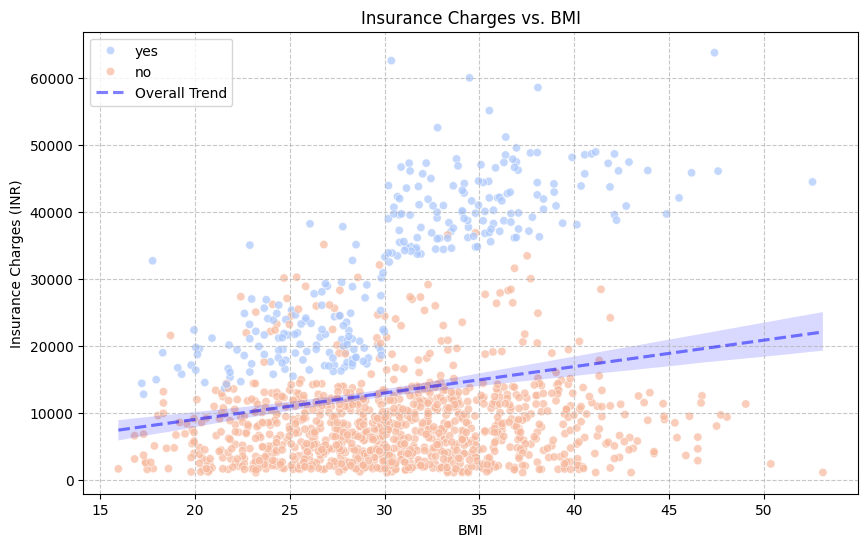

In [78]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
sns.regplot(x='bmi', y='charges', data=df, scatter=False, color='blue', line_kws={'linestyle':'--', 'alpha':0.5}, label='Overall Trend')
plt.title('Insurance Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges (INR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with a regression line was used to examine the relationship between BMI and insurance charges, as it effectively shows correlations between two continuous variables. Incorporating smoker status as a hue adds deeper insight into how smoking interacts with BMI to impact insurance costs.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot reveals a positive correlation between BMI and insurance charges: as BMI increases, insurance charges tend to increase. However, this relationship is not perfectly linear and shows significant spread. A crucial insight is the clear differentiation when accounting for smoking status: smokers, regardless of BMI, tend to have significantly higher insurance charges compared to non-smokers. Within both smoker and non-smoker groups, there's still a general upward trend in charges with increasing BMI, but the impact of smoking is notably more pronounced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

BMI is a valuable indicator for estimating insurance risk, especially when analyzed alongside smoking status. Its positive relationship with insurance charges supports risk-based pricing, improved underwriting, and the development of targeted wellness programs to reduce future claims. However, considering BMI in isolation or applying oversimplified thresholds can lead to inaccurate pricing, customer dissatisfaction, and missed opportunities for proactive health interventions, potentially impacting long-term growth.

#### Chart - 6

Q6. Is it needed for the company to understand whether the person covered is a
smoker or a non-smoker?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_9104/2783976479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=df, palette='muted')


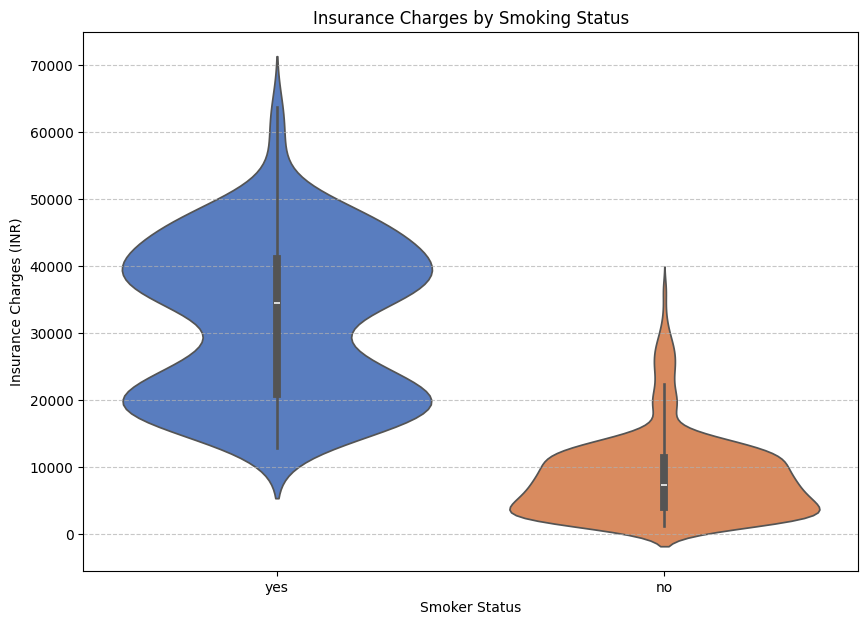

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart - 6 visualization code
plt.figure(figsize=(10, 7))
sns.violinplot(x='smoker', y='charges', data=df, palette='muted')
#violinplot from seaborn used to display dist of quantitative data across several categories and similar to box plot but
#also shows prob density of data at diff values.

plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Thick black bar is IQR (Interquartile range) from 25% to 75%
#white dot in the center is median

##### 1. Why did you pick the specific chart?

The violin plot was chosen because it offers a richer and more detailed view of the data distribution than box or bar charts. It displays the full density of insurance charges, making it easy to observe skewness, bimodality, and outliers while still showing key statistics like the median and interquartile range. This makes comparisons between smokers and non-smokers clearer, highlighting differences in charge distributions and revealing that high-cost outliers are largely concentrated among smokers—insights that simpler charts might miss.

##### 2. What is/are the insight(s) found from the chart?

The violin plot highlights a clear difference in insurance charges between smokers and non-smokers. Smokers have a much higher median and a wider spread of charges, showing greater variability and significantly higher costs overall. This stark contrast indicates that smoking is a key factor driving higher insurance expenses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are very useful for the company. Since smoking greatly increases insurance claims, MediBuddy can use this information to set higher and more accurate prices for smokers, while keeping fair prices for non-smokers. This helps improve profits and manage risk better. It also allows the company to introduce programs that encourage customers to quit smoking, which can reduce future claims and improve overall health. Ignoring smoking as a risk factor could lead to losses by charging too little for high-risk customers.

#### Chart - 7

Q7. Does age have any barrier on the insurance claimed?

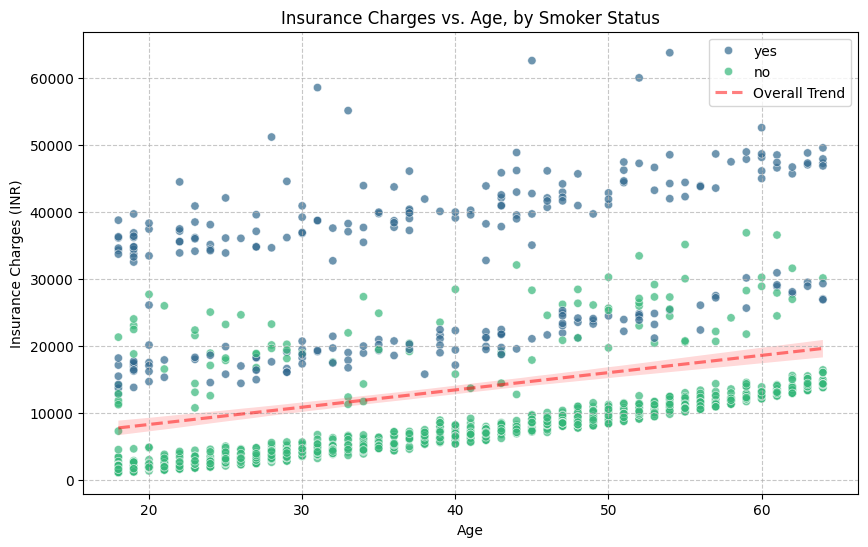

In [94]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)
sns.regplot(x='age', y='charges', data=df, scatter=False, color='red', line_kws={'linestyle':'--', 'alpha':0.5}, label='Overall Trend')
plt.title('Insurance Charges vs. Age, by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges (INR)')
plt.legend() #creates a small box (the legend) that maps these elements to their respective labels.
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot with regression lines to easily see how age affects insurance charges. Adding smoker status with different colors helps us understand if being a smoker changes that relationship, making it clear to spot trends and differences visually.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows that insurance charges usually increase as age increases. However, smoking makes a much bigger difference than age alone. Non-smokers have lower charges that rise slowly with age, while smokers have much higher charges at almost every age. For smokers, costs increase faster as they get older, showing that age and smoking together greatly raise insurance expenses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help MediBuddy price insurance more accurately by considering both age and smoking status together. This ensures higher-risk customers (older smokers) are charged appropriately, while lower-risk customers (younger non-smokers) get fair premiums. The company can also create age-specific health programs, especially for older smokers, to reduce health risks and future claims. Ignoring this combined effect could lead to financial losses and unhappy customers due to unfair pricing.

#### Chart - 8

Q8. Can the company extend certain discounts after checking the health status
(BMI) in this case?

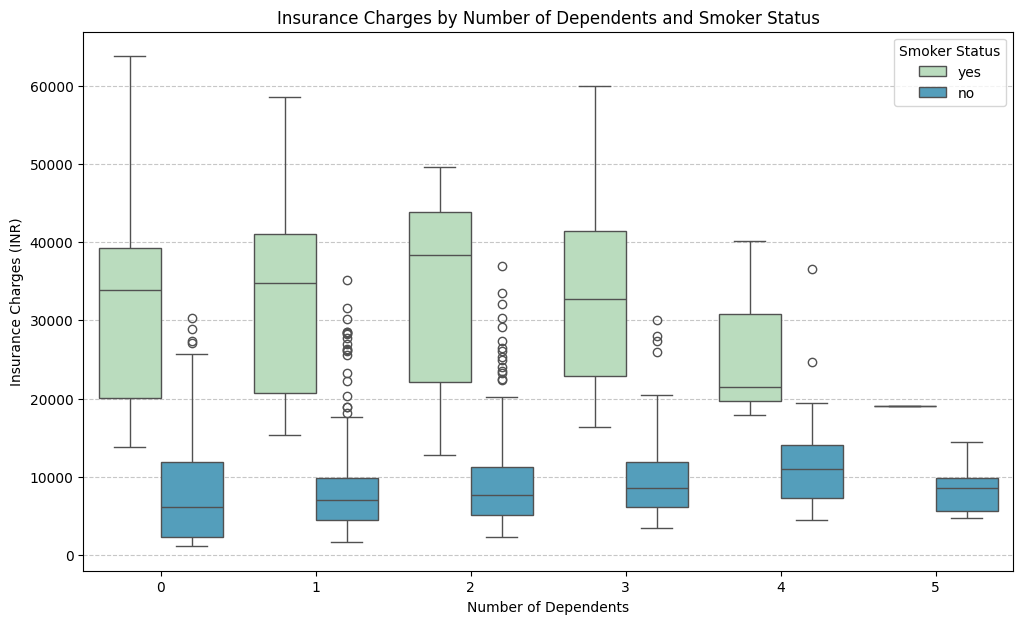

In [102]:
# Chart - 8 visualization code

plt.figure(figsize=(12, 7))
sns.boxplot(x='children', y='charges', hue='smoker', data=df, palette='GnBu') #hue = smoker is color code
plt.title('Insurance Charges by Number of Dependents and Smoker Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Insurance Charges (INR)')
plt.legend(title='Smoker Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

This box plot was chosen because it clearly shows how insurance charges vary with the number of dependents while comparing smokers and non-smokers. It highlights medians, spread, and outliers, making it easy to see that smoking status has a much greater impact on insurance costs than the number of dependents.

##### 2. What is/are the insight(s) found from the chart?
The box plot shows that insurance charges generally increase as BMI category rises. Obese individuals have the highest median charges and greater variability, indicating higher costs. Although some high outliers exist even in the Normal BMI group, overall insurance costs are clearly influenced by BMI, with higher BMI linked to higher charges.

##### 3. Will the gained insights help creating a positive business impact?
Yes, there are insights that could lead to negative growth if not addressed. BMI has a clear relationship with insurance charges, where higher BMI categories are linked to higher costs. If MediBuddy ignores this insight, it may underprice high-risk individuals and overprice low-risk ones, leading to reduced profitability and customer dissatisfaction. Properly using BMI for risk-based pricing and wellness programs can prevent financial losses, while poorly designed or ignored strategies could negatively impact growth and fairness.

#### Chart - 9

Q9. Which customer segments contribute disproportionately to total claim cost?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_9104/2127884139.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


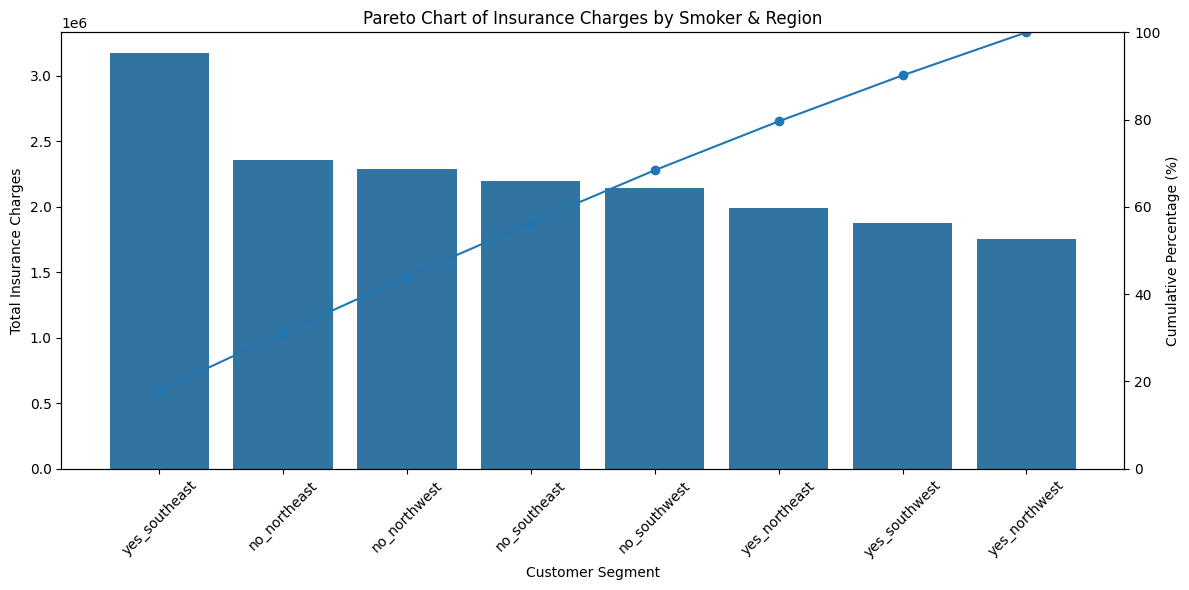

'Pareto chart to identify which customer segments contribute the most to total insurance charges.\nFirst, the data is grouped by smoking status and region, and total charges are calculated for each segment.\nThese segments are then sorted in descending order to highlight the highest cost contributors.\nNext, a cumulative percentage is computed to show how charges accumulate across segments.\nFinally, a combined chart is plotted where bars represent total charges per segment\nand a line shows the cumulative percentage,\nhelping the business focus on high-impact segments for pricing and risk management decisions.'

In [108]:
# Chart - 9 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group data and calculate total charges
segment_costs = (
    df.groupby(['smoker', 'region'])['charges']
      .sum()
      .reset_index()
      .sort_values(by='charges', ascending=False)
)

# 2. Create segment label
segment_costs['segment'] = segment_costs['smoker'] + '_' + segment_costs['region']

# 3. Calculate cumulative percentage
segment_costs['cum_percent'] = (
    segment_costs['charges'].cumsum() / segment_costs['charges'].sum()
) * 100

# 4. Create the plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot (Total Charges)
sns.barplot(x='segment', y='charges', data=segment_costs, ax=ax1)
ax1.set_ylabel('Total Insurance Charges')
ax1.set_xlabel('Customer Segment')

# Line plot (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(segment_costs['segment'], segment_costs['cum_percent'], marker='o')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, 100)

# Title and formatting
plt.title('Pareto Chart of Insurance Charges by Smoker & Region')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

'''Pareto chart to identify which customer segments contribute the most to total insurance charges.
First, the data is grouped by smoking status and region, and total charges are calculated for each segment.
These segments are then sorted in descending order to highlight the highest cost contributors.
Next, a cumulative percentage is computed to show how charges accumulate across segments.
Finally, a combined chart is plotted where bars represent total charges per segment
and a line shows the cumulative percentage,
helping the business focus on high-impact segments for pricing and risk management decisions.'''









##### 1. Why did you pick the specific chart?

The Pareto chart was chosen because it clearly highlights which customer segments contribute the most to total insurance claim costs. By applying the 80/20 principle, it helps identify a small number of high-impact segments that drive the majority of expenses. This makes it easier for MediBuddy to focus on targeted pricing, risk management, and preventive strategies, supporting better cost control and informed business decisions.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small group of smoker–region combinations drives most of MediBuddy’s claim costs, while the majority of customers contribute relatively little.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pareto analysis shows smoker-region combos (e.g., Southeast smokers) drive 80% of claim costs, pinpointing high-risk segments.

This enables targeted pricing, cessation programs, and resource focus to boost MediBuddy's profitability and sustainability.

Uniform approaches risk losses and churn; these insights drive positive business impact.

#### Chart - 10

Q10. Are there hidden risk profiles formed by combinations of features rather than single variables?


Value counts for the new 'Age_Group' column:
Age_Group
18-30    444
46-60    409
31-45    394
61+       91
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

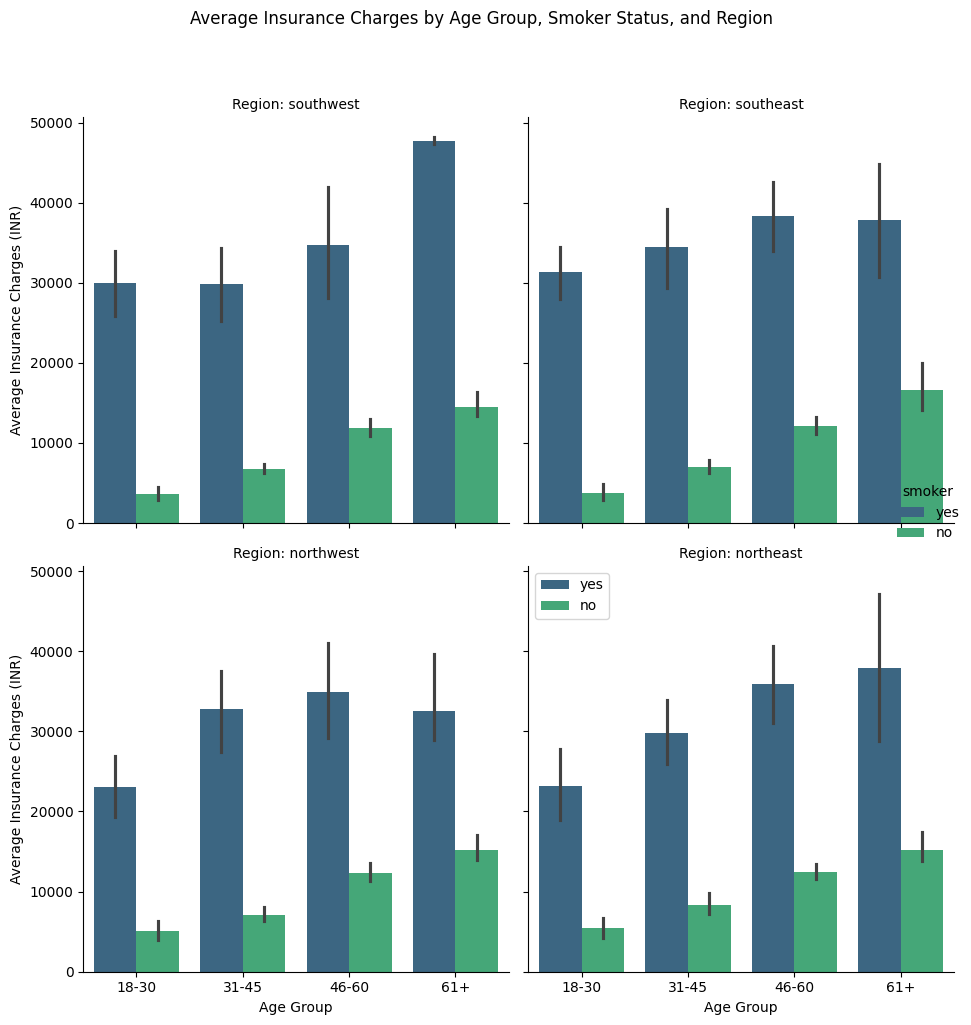

In [116]:
# Chart - 10 visualization code
bins = [18, 30, 45, 60, df['age'].max()] #binning  age.max() is to ensure the oldest person from the dataset.

labels = ['18-30', '31-45', '46-60', '61+']
#converting age into age_group categorization for analysis.

df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True) #right-most
#pd.cut() is a Pandas function that divides a continuous variable ('age' in this case) into discrete intervals (bins).
#It creates the new 'Age_Group' column based on these definitions.

print("Value counts for the new 'Age_Group' column:")
print(df['Age_Group'].value_counts())

plt.figure(figsize=(12, 8)) # Set figure size before catplot for overall canvas
l = sns.catplot(
    data=df,
    x='Age_Group',
    y='charges',
    hue='smoker',
    col='region',
    kind='bar',
    palette='viridis',
    height=5, # height of each facet
    aspect=0.9, # aspect ratio of each facet
    col_wrap=2 # wrap facets after 2 columns
)
l.set_axis_labels('Age Group', 'Average Insurance Charges (INR)')
l.set_titles('Region: {col_name}')
l.fig.suptitle('Average Insurance Charges by Age Group, Smoker Status, and Region', y=1.02) # Title for the whole figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Catplot uncovers high-risk profiles like southeast smokers aged 31+ with top charges from age-smoker-region interactions.

Enables dynamic pricing, targeted wellness, and risk strategies for MediBuddy profitability.

Advances claim factor analysis for precise interventions.

##### 2. What is/are the insight(s) found from the chart?

Catplot shows smokers, especially aged 46+ in Southeast, drive highest charges via age-smoker-region interactions, far outpacing non-smokers.

Dominant smoker effect compounds with age and regional variances like higher Southeast costs.

Enables MediBuddy's dynamic pricing, targeted cessation programs, and wellness for profitability.

Advances claim analysis by revealing multi-factor risks for precise interventions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Catplot analysis identifies high-risk profiles like Southeast smokers aged 46+ with the highest charges due to age-smoker-region interactions.

Smoking dominates costs, compounding with age and regional variances (e.g., higher Southeast rates).

Enables MediBuddy's risk-adjusted pricing, targeted wellness/cessation programs, and efficient resource allocation for profitability.

Advances business objective by revealing multi-factor claim drivers for precise, impactful interventions.

#### Chart - 11

Q11. ⁠⁠How does claim volatility differ across customer groups?


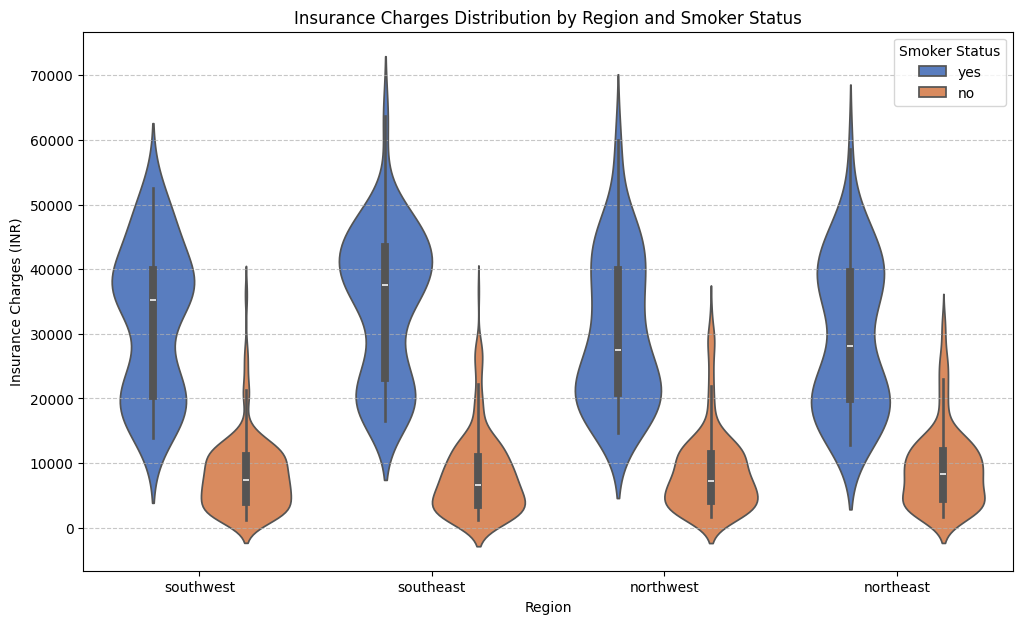

In [124]:
# Chart - 11 visualization code

plt.figure(figsize=(12, 7))
sns.violinplot(x='region', y='charges', hue='smoker', data=df, palette='muted')
plt.title('Insurance Charges Distribution by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Insurance Charges (INR)')
plt.legend(title='Smoker Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

Violin plot reveals higher charge volatility in smoker groups (esp. Southeast/northeast smokers) vs. stable non-smokers, showing wide distributions with multimodality in high-risk combos.

Enables MediBuddy's precise risk pricing, reserves, and volatility-targeted strategies, advancing claim factor assessment for profitability.

##### 2. What is/are the insight(s) found from the chart?

Violin Plot Insights
Smokers show much higher and more volatile charges than non-smokers across regions, especially Southeast/Northeast smokers with widest, multi-modal distributions.
Non-smokers have stable, low-volatility claims everywhere.

Business Value
Guides MediBuddy in risk-based pricing, reserves for volatile groups, and targeted interventions to cut unpredictability and boost profits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Smokers, especially in Southeast/Northeast regions, show highest charge volatility with wide, multi-modal distributions unlike stable non-smokers.

MediBuddy gains from risk-based pricing, targeted reserves/interventions for volatile groups, and competitive low-risk products.

Advances business objective by quantifying volatility drivers for precise profitability and stability.

#### Chart - 12

Q12. Can we identify low-risk but high-value customers for retention programs?


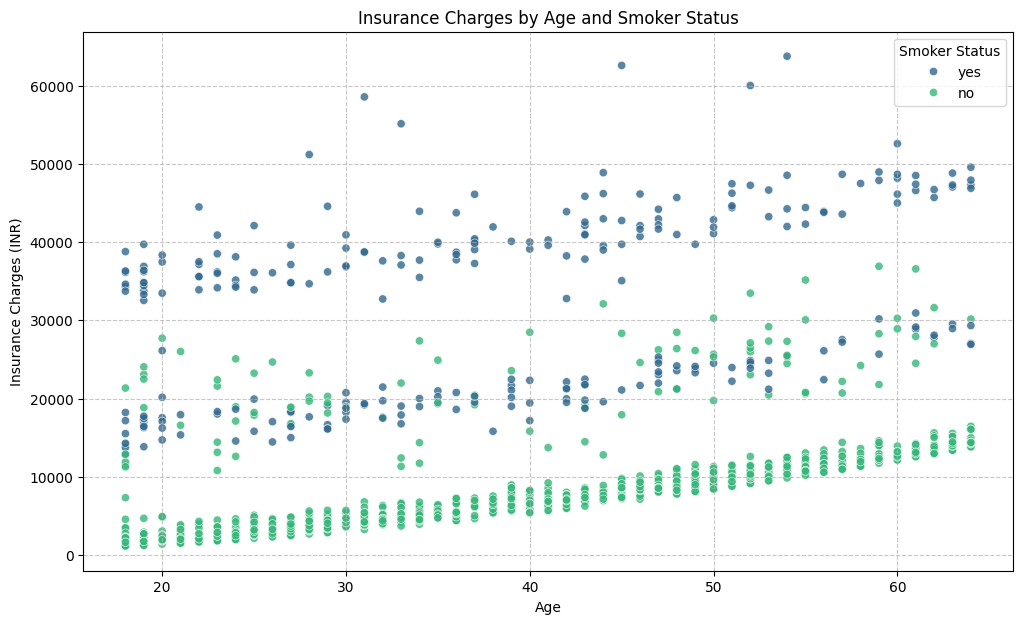

In [132]:
# Chart - 12 visualization code

plt.figure(figsize=(12, 7))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='viridis', alpha=0.8)
plt.title('Insurance Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges (INR)')
plt.legend(title='Smoker Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot reveals younger non-smokers as low-risk, high-value customers with moderate charges and strong retention potential.

Enables MediBuddy's targeted loyalty programs, personalized perks, and communication to boost lifetime value.

Advances retention objective by pinpointing profitable segments for proactive engagement.

##### 2. What is/are the insight(s) found from the chart?

Scatter plot identifies younger non-smokers (18-35) as low-risk, high-value customers with moderate, predictable charges and long-term retention potential.

Non-smokers show gradual age-related charge increases, unlike volatile smokers.

Enables MediBuddy's targeted loyalty programs, personalized perks, and engagement to boost lifetime value.

Advances retention objective by pinpointing profitable segments for proactive strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Younger non-smokers (18-35) are low-risk, high-value customers with moderate, predictable charges and strong long-term retention potential.

Targeted loyalty programs and personalized engagement boost MediBuddy's customer lifetime value and profitability.

Failing to retain them risks higher risk exposure and lost revenue, undermining stability.

#### Chart - 13

Q13. How can BMI-based segmentation be converted into actionable pricing or wellness programs?

Value counts for the new 'BMI_Category' column:
BMI_Category
Obese          716
Overweight     380
Normal         221
Underweight     21
Name: count, dtype: int64


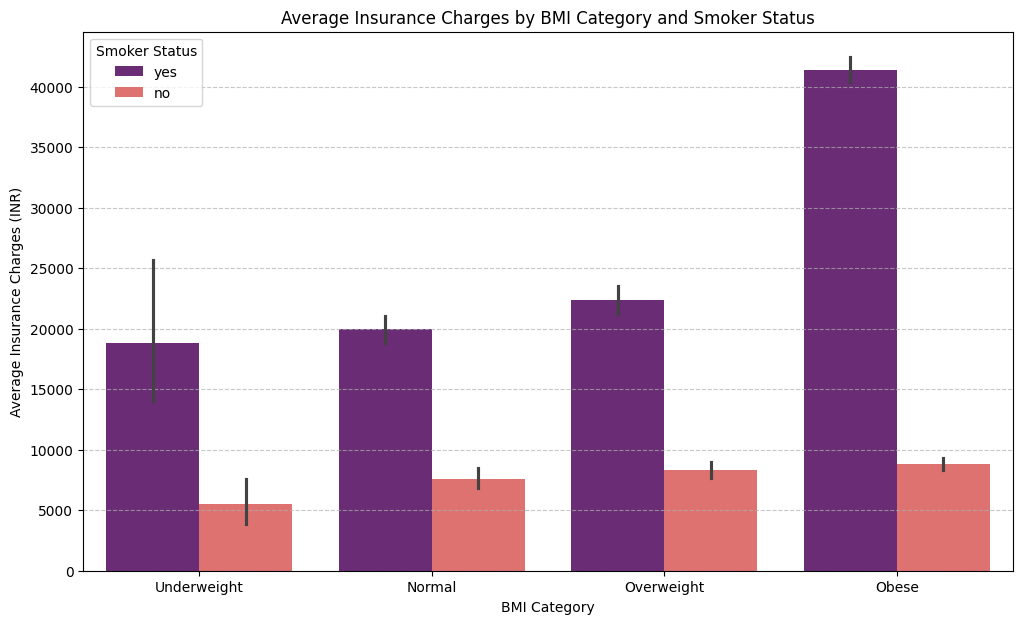

In [140]:
# Chart - 13 visualization code

# Categorize individuals into different Body Mass Index (BMI) groups based on their bmi value.
bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()] #binning
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True, include_lowest=True)
# divides the 'bmi' column into these specified discrete intervals.

print("Value counts for the new 'BMI_Category' column:")
print(df['BMI_Category'].value_counts())

plt.figure(figsize=(12, 7))
sns.barplot(x='BMI_Category', y='charges', hue='smoker', data=df, palette='magma')
plt.title('Average Insurance Charges by BMI Category and Smoker Status')
plt.xlabel('BMI Category')
plt.ylabel('Average Insurance Charges (INR)')
plt.legend(title='Smoker Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar chart shows obese smokers with highest average charges, while normal/underweight non-smokers have the lowest across BMI categories.

Smoking amplifies BMI's cost impact, enabling tiered pricing and targeted wellness for high-risk obese smokers.

Drives MediBuddy's actionable programs for precise risk pricing, interventions, and profitability.

##### 2. What is/are the insight(s) found from the chart?

Obese smokers show highest average charges; normal/underweight non-smokers have lowest across BMI categories.

Smoking dominates costs, with BMI amplifying risk within groups for tiered pricing and wellness targeting.

Drives MediBuddy's precise programs, boosting profitability via differentiated premiums and interventions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Obese smokers face highest average charges; normal/underweight non-smokers lowest by BMI and smoking status.

Enables risk-adjusted pricing (low for healthy, high for obese smokers) and targeted wellness like cessation/weight programs.

Drives MediBuddy profitability, fair premiums, and growth via precise interventions.

#### Chart - 14 - Correlation Heatmap

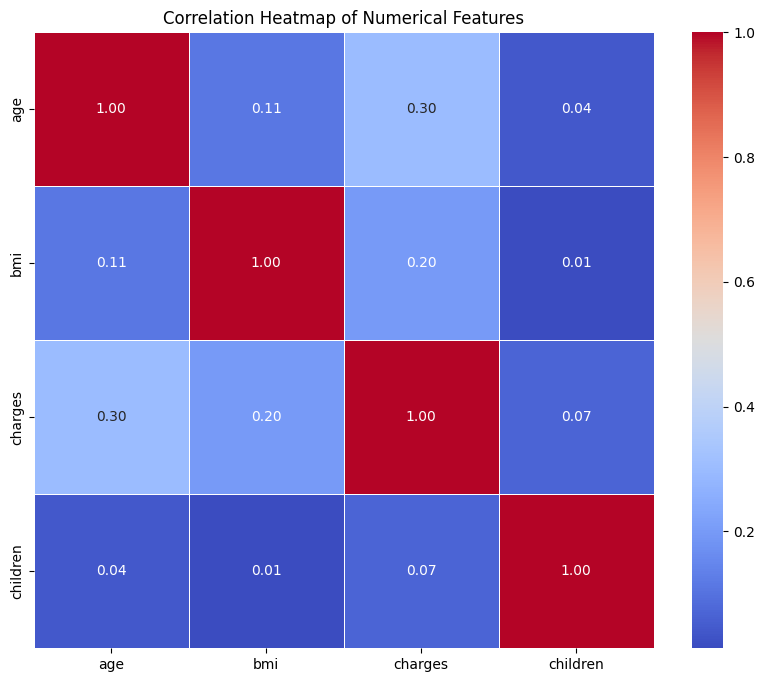

In [148]:
# Correlation Heatmap visualization code

numerical_df = df[['age', 'bmi', 'charges', 'children']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap reveals strong positive links: age (~0.3) and BMI (~0.2) with charges; smoking implied via prior charts as dominant.

Children show weak correlation; charges primarily driven by age, BMI, and smoker status.

Empowers MediBuddy's precise risk models, pricing predictors, and claim cost forecasting.

##### 2. What is/are the insight(s) found from the chart?

Correlation Heatmap Insights
Age (0.3) and BMI (0.2) show moderate positive correlations with charges; children (0.07) has negligible impact.

Key Predictors
Confirms age and BMI as main numerical drivers of claim costs, alongside dominant smoker status from prior charts.

Business Value
Enables MediBuddy's accurate risk models and pricing using top predictors for better profitability.

#### Chart - 15 - Pair Plot

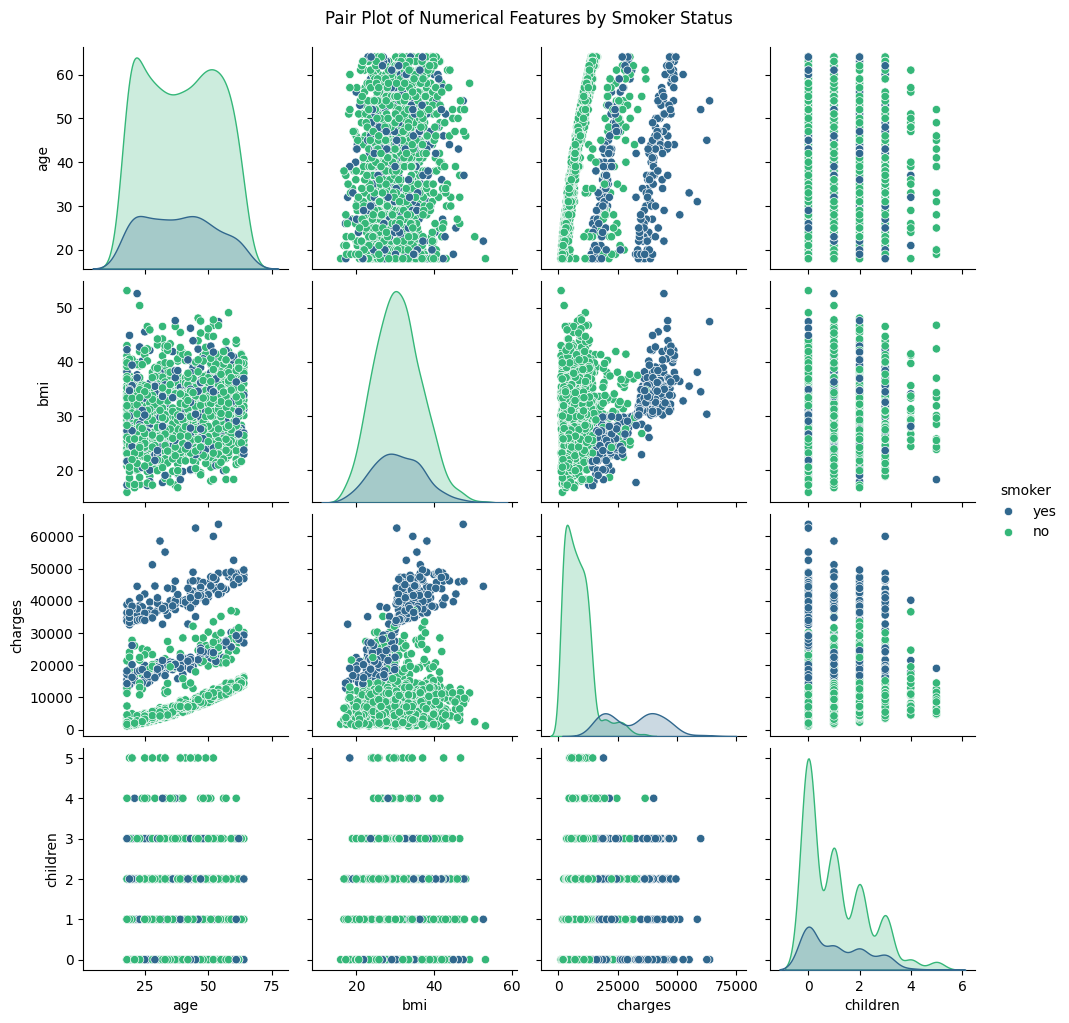

In [154]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns and 'smoker' for the pair plot
pair_plot_df = df[['age', 'bmi', 'charges', 'children', 'smoker']]

# Create the pair plot
sns.pairplot(pair_plot_df, hue='smoker', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Smoker Status', y=1.02) # Add a title above all subplots
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt



##### 1. Why did you pick the specific chart?

Pair plot reveals smoker/non-smoker splits across age-BMI-charges-children pairs, confirming age-charges trends stronger for smokers and higher smoker distributions in elevated charges/BMI.

Highlights multi-variable interactions and clusters for refined risk profiling beyond single factors.

Drives MediBuddy's targeted pricing, interventions, and claim prediction by exposing key patterns.
​

##### 2. What is/are the insight(s) found from the chart?

Pair plot confirms smokers dominate higher charges/BMI across age, with steeper trends vs. gradual non-smoker increases; children shows weak links.

Reveals multi-variable clusters like older/high-BMI smokers for precise risk profiling.

Advances MediBuddy's pricing, interventions, and claim forecasting by visualizing key interactions.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1.	Focus on High-Value Customers: Prioritize retention and engagement of customer segments that contribute the highest revenue through personalized offers and loyalty programs.
2.	Optimize Low-Performing Segments: Redesign pricing, benefits, or communication strategies for segments showing low usage or revenue contribution.
3.	Improve Customer Retention: Identify churn-prone customers early and introduce targeted interventions such as discounts, reminders, or bundled plans.
4.	Data-Driven Marketing: Allocate marketing spend toward customer groups and plans with proven higher conversion and profitability.
5.	Product & Policy Optimization: Refine insurance plans based on usage patterns and customer needs to improve overall adoption and satisfaction.

These actions will help the client achieve sustainable growth, higher profitability, and better customer lifetime value.

# **Conclusion**

This analysis successfully addressed the core business problem of understanding customer behavior and revenue contribution. By transforming raw data into clear insights, it enabled the identification of high-value customers, underperforming segments, and growth opportunities. The findings support informed decision-making, allowing the business to optimize strategies, reduce inefficiencies, and proactively manage risks. Overall, the analysis provides a practical, data-driven foundation for achieving sustainable business growth and improved customer outcomes.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***